In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face MAsk Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_94.jpg', 'with_mask_2145.jpg', 'with_mask_606.jpg', 'with_mask_2978.jpg', 'with_mask_3281.jpg']
['with_mask_109.jpg', 'with_mask_2228.jpg', 'with_mask_1514.jpg', 'with_mask_302.jpg', 'with_mask_1661.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1390.jpg', 'without_mask_740.jpg', 'without_mask_1538.jpg', 'without_mask_1775.jpg', 'without_mask_263.jpg']
['without_mask_1533.jpg', 'without_mask_663.jpg', 'without_mask_114.jpg', 'without_mask_2297.jpg', 'without_mask_282.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

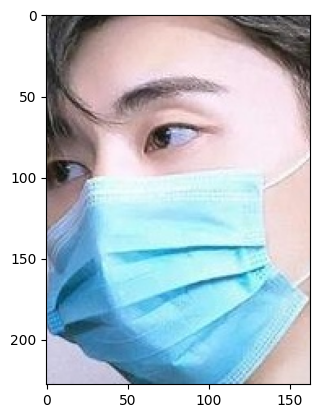

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

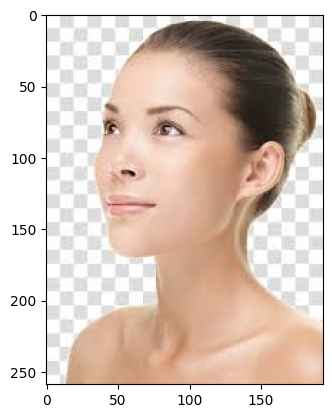

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resizes the Image
2. Convert the images into Numpy Array

In [ ]:
#convert umages to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7546

array([[[105,  87,  75],
        [100,  82,  70],
        [ 94,  77,  66],
        ...,
        [ 79,  60,  44],
        [ 81,  62,  45],
        [ 93,  72,  55]],

       [[102,  84,  72],
        [116,  98,  86],
        [105,  87,  77],
        ...,
        [ 71,  52,  37],
        [ 74,  55,  38],
        [ 90,  69,  52]],

       [[ 88,  70,  58],
        [109,  91,  79],
        [101,  84,  74],
        ...,
        [ 89,  70,  55],
        [ 81,  62,  45],
        [ 71,  49,  32]],

       ...,

       [[153, 111,  99],
        [142, 100,  88],
        [139,  96,  84],
        ...,
        [183, 162, 134],
        [183, 162, 135],
        [180, 161, 133]],

       [[152, 109,  99],
        [138,  97,  86],
        [132,  88,  78],
        ...,
        [184, 163, 134],
        [183, 163, 132],
        [181, 162, 131]],

       [[152, 109, 100],
        [136,  93,  85],
        [130,  86,  77],
        ...,
        [181, 162, 132],
        [182, 163, 131],
        [182, 162, 129]]], dtype=uint8)
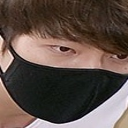

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7546, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
print(f"Length of X: {len(X)}")
print(f"Length of Y: {len(Y)}")


Length of X: 7546
Length of Y: 7553


In [ ]:
min_len = min(len(X), len(Y))
X = X[:min_len]
Y = Y[:min_len]


Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7546, 128, 128, 3) (6036, 128, 128, 3) (1510, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[  8,   2,  38],
        [  9,   4,  39],
        [ 10,   5,  40],
        ...,
        [ 13,   8,  48],
        [ 11,   6,  46],
        [ 12,   7,  47]],

       [[  9,   3,  39],
        [ 10,   4,  40],
        [ 10,   5,  41],
        ...,
        [ 11,   6,  46],
        [ 12,   7,  47],
        [ 14,   9,  49]],

       [[  9,   3,  39],
        [  9,   3,  39],
        [ 10,   4,  40],
        ...,
        [ 12,   7,  47],
        [ 13,   8,  48],
        [ 16,  11,  51]],

       ...,

       [[251, 210,  96],
        [252, 212,  98],
        [252, 212,  98],
        ...,
        [212, 228, 215],
        [212, 228, 215],
        [211, 227, 214]],

       [[251, 210,  96],
        [251, 211,  97],
        [252, 212,  98],
        ...,
        [210, 226, 213],
        [213, 229, 217],
        [212, 228, 215]],

       [[251, 210,  96],
        [252, 212,  98],
        [253, 213,  99],
        ...,
        [205, 221, 210],
        [206, 222, 212],
        [207, 223, 213]]], dtype=uint8)
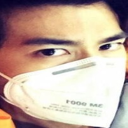

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.03137255, 0.00784314, 0.14901961],
        [0.03529412, 0.01568627, 0.15294118],
        [0.03921569, 0.01960784, 0.15686275],
        ...,
        [0.05098039, 0.03137255, 0.18823529],
        [0.04313725, 0.02352941, 0.18039216],
        [0.04705882, 0.02745098, 0.18431373]],

       [[0.03529412, 0.01176471, 0.15294118],
        [0.03921569, 0.01568627, 0.15686275],
        [0.03921569, 0.01960784, 0.16078431],
        ...,
        [0.04313725, 0.02352941, 0.18039216],
        [0.04705882, 0.02745098, 0.18431373],
        [0.05490196, 0.03529412, 0.19215686]],

       [[0.03529412, 0.01176471, 0.15294118],
        [0.03529412, 0.01176471, 0.15294118],
        [0.03921569, 0.01568627, 0.15686275],
        ...,
        [0.04705882, 0.02745098, 0.18431373],
        [0.05098039, 0.03137255, 0.18823529],
        [0.0627451 , 0.04313725, 0.2       ]],

       ...,

       [[0.98431373, 0.82352941, 0.37647059],
        [0.98823529, 0.83137255, 0.38431373],
        [0.98823529, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - acc: 0.6881 - loss: 0.6587 - val_acc: 0.8957 - val_loss: 0.2737
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.8880 - loss: 0.2877 - val_acc: 0.8891 - val_loss: 0.2860
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.8978 - loss: 0.2617 - val_acc: 0.9040 - val_loss: 0.2240
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9161 - loss: 0.2217 - val_acc: 0.9156 - val_loss: 0.2160
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9410 - loss: 0.1711 - val_acc: 0.9255 - val_loss: 0.2017


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9134 - loss: 0.1952
Test Accuracy = 0.9218543171882629


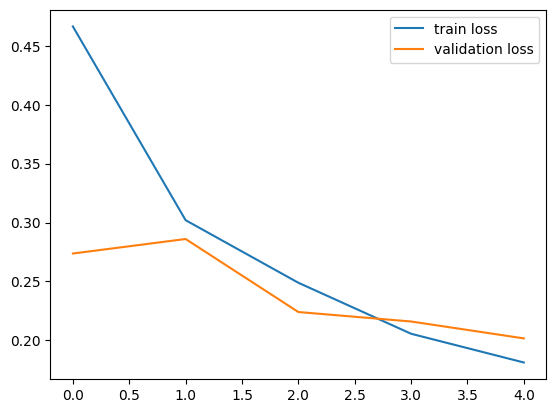

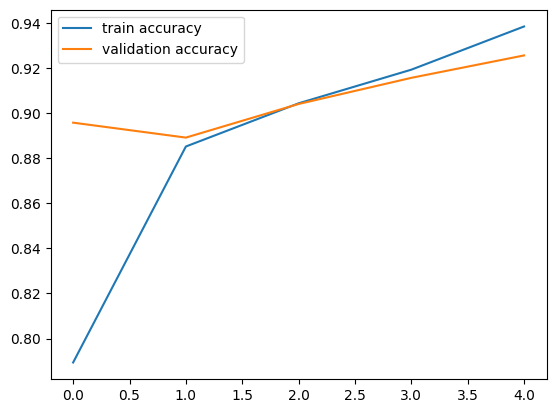

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predicitve System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')